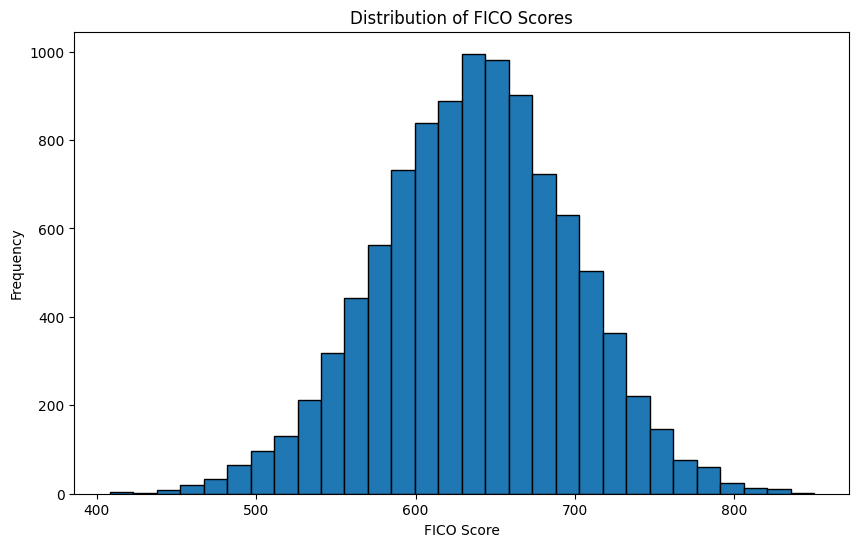

FICO Score Range: 408 - 850
FICO Score Mean: 637.56
FICO Score Median: 638.00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Load the data
data = pd.read_csv('Loan_Data.csv')

# Analyze FICO score distribution
plt.figure(figsize=(10, 6))
plt.hist(data['fico_score'], bins=30, edgecolor='black')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

# Calculate some statistics
print(f"FICO Score Range: {data['fico_score'].min()} - {data['fico_score'].max()}")
print(f"FICO Score Mean: {data['fico_score'].mean():.2f}")
print(f"FICO Score Median: {data['fico_score'].median():.2f}")


FICO Score Buckets:
Rating 5: 408.00 - 587.00
Rating 4: 587.00 - 623.00
Rating 3: 623.00 - 653.00
Rating 2: 653.00 - 688.00
Rating 1: 688.00 - 850.00

Default Rates by FICO Rating:
fico_rating
Rating 5    0.405651
Rating 4    0.215260
Rating 3    0.154822
Rating 2    0.100050
Rating 1    0.055610
Name: default, dtype: float64


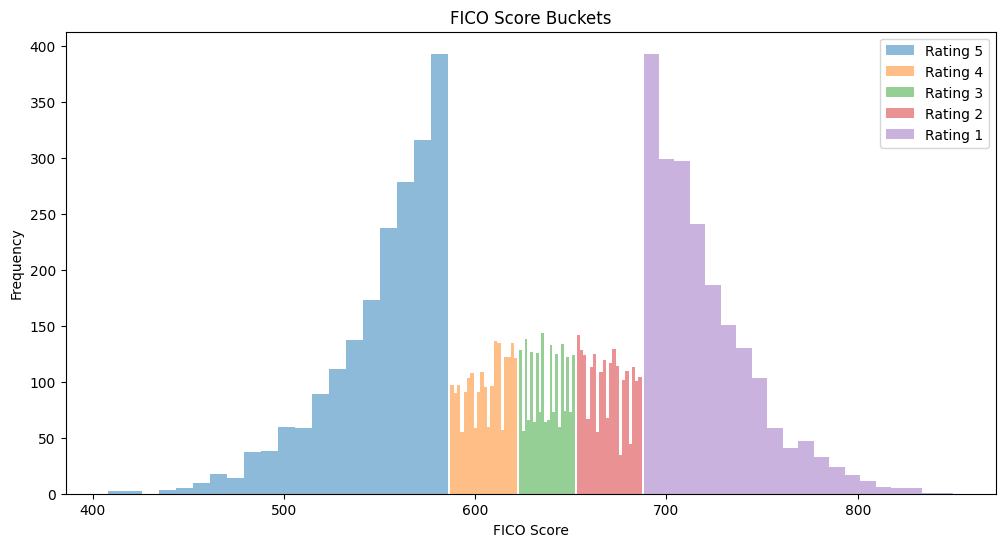

In [2]:
# Define the number of buckets (you can adjust this)
n_buckets = 5

# Create the discretizer
discretizer = KBinsDiscretizer(n_bins=n_buckets, encode='ordinal', strategy='quantile')

# Fit and transform the FICO scores
fico_buckets = discretizer.fit_transform(data[['fico_score']])

# Get the bin edges
bin_edges = discretizer.bin_edges_[0]

# Create a rating map
rating_map = {i: f"Rating {n_buckets - i}" for i in range(n_buckets)}

# Add the bucketed scores to the dataframe
data['fico_bucket'] = fico_buckets
data['fico_rating'] = data['fico_bucket'].map(rating_map)

# Print the bucket boundaries and ratings
print("\nFICO Score Buckets:")
for i in range(n_buckets):
    if i == 0:
        print(f"{rating_map[i]}: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}")
    elif i == n_buckets - 1:
        print(f"{rating_map[i]}: {bin_edges[i]:.2f} - {data['fico_score'].max():.2f}")
    else:
        print(f"{rating_map[i]}: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}")

# Calculate default rates for each bucket
default_rates = data.groupby('fico_rating')['default'].mean().sort_index(ascending=False)
print("\nDefault Rates by FICO Rating:")
print(default_rates)

# Visualize the buckets
plt.figure(figsize=(12, 6))
for i in range(n_buckets):
    bucket_data = data[data['fico_bucket'] == i]['fico_score']
    plt.hist(bucket_data, bins=20, alpha=0.5, label=rating_map[i])

plt.title('FICO Score Buckets')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()